# Background frequencies

In [1]:
from katlas.core import *
import pandas as pd

In [2]:
df = Data.get_ks_unique()

In [3]:
df.head()

,sub_site,num_kin,bin,sub_genes,site_seq,source_combine,acceptor,O00141_SGK1,O00238_BMPR1B,O00311_CDC7,...,Q9Y2K2_SIK3,Q9Y2U5_MAP3K2,Q9Y3S1_WNK2,Q9Y463_DYRK1B,Q9Y4K4_MAP4K5,Q9Y572_RIPK3,Q9Y5S2_CDC42BPB,Q9Y6E0_STK24,Q9Y6M4_CSNK1G3,Q9Y6R4_MAP3K4
0,A0A2R8Y4L2_S158,1,1,HNRNPA1L3 HNRNPA1P48,TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A2R8Y4L2_S22,3,2~10,HNRNPA1L3 HNRNPA1P48,SKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTD,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A2R8Y4L2_S6,3,2~10,HNRNPA1L3 HNRNPA1P48,_______________MSKSEsPKEPEQLRKLFIGGLsFEtT,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A2R8Y4L2_S95,65,11~100,HNRNPA1L3 HNRNPA1P48,RPHKVDGRVVEPKRAVSREDsQRPDAHLTVKKIFVGGIKED,Sugiyama,S,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,A0A2R8Y4L2_T25,3,2~10,HNRNPA1L3 HNRNPA1P48,EsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVV,Sugiyama,T,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PSSMs - ks dataset

In [7]:
def get_bg_dict(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    site_pssm = get_prob(site, seq_col)
    return flatten_pssm(site_pssm, True)

In [8]:
acceptors = ['S','T','Y','ST','STY']

In [21]:
index_names = 'KS Dataset_' + pd.Series(acceptors)

In [22]:
bg_pssms = pd.DataFrame([get_bg_dict(df,acceptor) for acceptor in acceptors],index=index_names)

In [23]:
def get_site_cnt(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    return len(site)

In [24]:
cnt = {name:get_site_cnt(df,acceptor) for acceptor,name in zip(acceptors,index_names)}

In [26]:
from katlas.plot import *


KeyboardInterrupt


KeyboardInterrupt



NameError: name 'save_pdf' is not defined

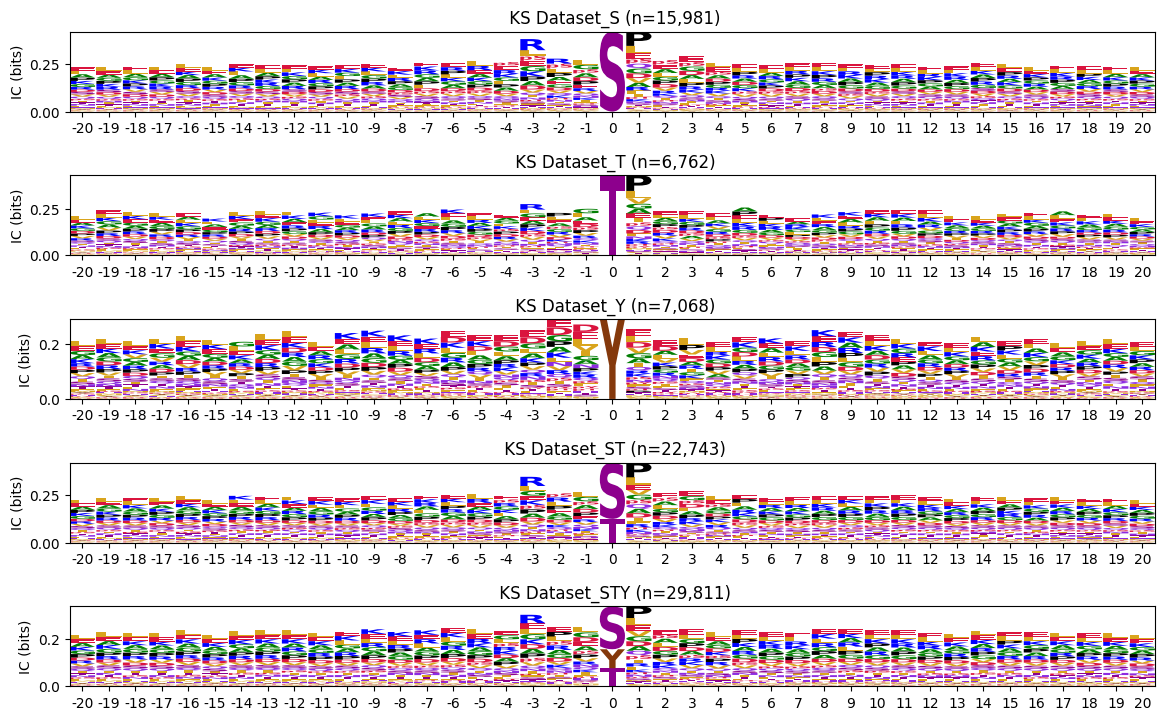

In [25]:
plot_logos(bg_pssms,cnt,prefix='')
save_pdf('../../fig/background_ks.pdf')

## PSSMs - human phosphoproteome

In [ ]:
human = Data.get_human_site()

In [ ]:
human['acceptor']=human.site.str[0]

In [ ]:
human.head(1)

,substrate_uniprot,substrate_genes,site,source,AM_pathogenicity,substrate_sequence,substrate_species,sub_site,substrate_phosphoseq,position,site_seq,acceptor
0,A0A024R4G9,C19orf48 MGC13170 hCG_2008493,S20,psp,NaN,MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,Homo sapiens (Human),A0A024R4G9_S20,MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTRTWLLSH...,20,_MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTR,S


In [ ]:
index_names2 = 'human_' + pd.Series(acceptors)

In [ ]:
bg_pssms_human = pd.DataFrame([get_bg_dict(human,acceptor) for acceptor in acceptors],index=index_names2)

In [ ]:
bg_pssms_human

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
human_S,0.08364,0.06732,0.07243,0.01298,0.06843,0.04076,0.04860,0.03262,0.08046,0.01853,...,0.02240,0.06643,0.06452,0.04737,0.03316,0.05179,0.07982,0.04460,0.01317,0.00367
human_T,0.07986,0.06436,0.07476,0.01194,0.06270,0.04093,0.05299,0.03346,0.07854,0.02181,...,0.02007,0.07009,0.06264,0.04805,0.03220,0.05181,0.07866,0.04366,0.01702,0.00485
human_Y,0.07390,0.06714,0.07310,0.01602,0.05840,0.03946,0.05178,0.04145,0.08741,0.02026,...,0.02177,0.06572,0.05960,0.04994,0.03130,0.05538,0.07811,0.03470,0.01619,0.01660
human_ST,0.08279,0.06666,0.07295,0.01275,0.06714,0.04079,0.04959,0.03281,0.08003,0.01927,...,0.02188,0.06725,0.06410,0.04752,0.03295,0.05180,0.07956,0.04439,0.01403,0.00394
human_STY,0.08221,0.06669,0.07296,0.01296,0.06657,0.04071,0.04973,0.03338,0.08052,0.01933,...,0.02187,0.06715,0.06381,0.04768,0.03284,0.05203,0.07946,0.04377,0.01417,0.00475


In [ ]:
all_pssms = pd.concat([bg_pssms,bg_pssms_human])

In [ ]:
# all_pssms.to_parquet('~/katlas/dataset/CDDM/ks_background.parquet')

Accessible through Data.get_ks_background

In [ ]:
cnt_human = {name:get_site_cnt(human,acceptor) for acceptor,name in zip(acceptors,index_names2)}

In [ ]:
cnt.update(cnt_human)

In [ ]:
cnt

{'ks_S': 15981,
 'ks_T': 6762,
 'ks_Y': 7068,
 'ks_ST': 22743,
 'ks_STY': 29811,
 'human_S': 86995,
 'human_T': 25091,
 'human_Y': 7869,
 'human_ST': 112086,
 'human_STY': 119955}

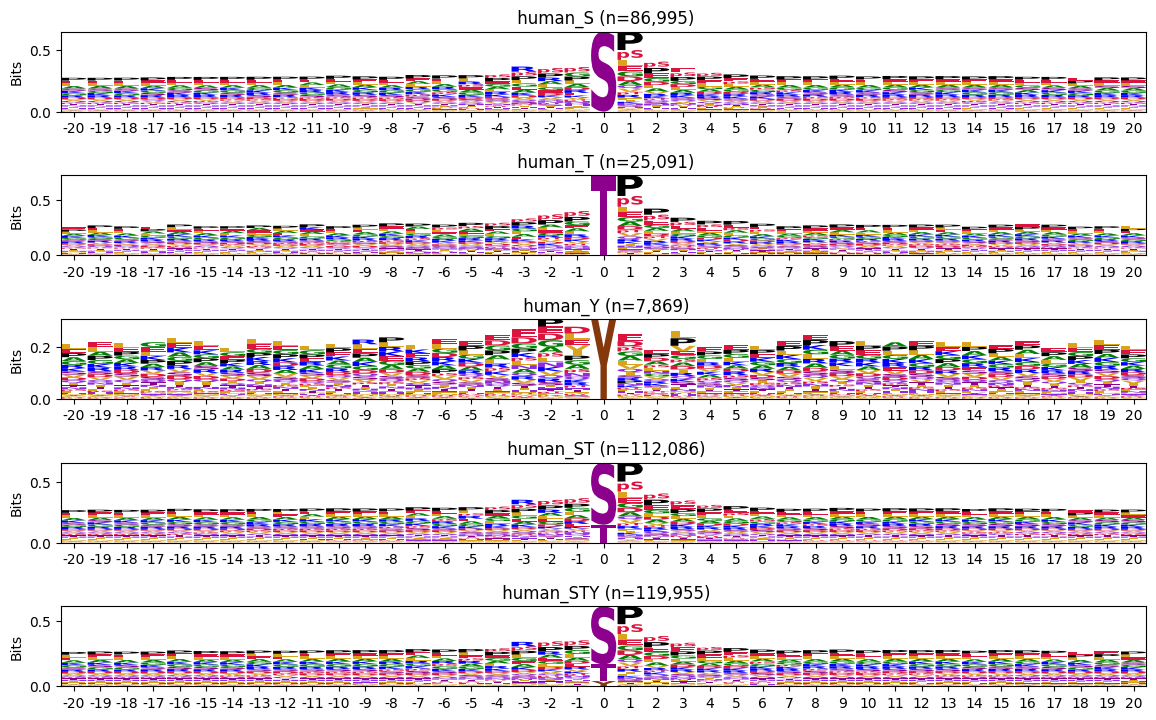

In [ ]:
plot_logos(bg_pssms_human,cnt,prefix='')